# Приоритизация гипотез и проведения A/B тестов

Данный анализ посвещен проверке и приоритизации девяти гипотез по увеличению выручки интернет-магазина. 
Необходимо выявить наиболее перспективные гипотезы, а также проанализировать результаты A/B теста.

Данные для приоритизации включают в себя список гипотез и следующие параметры, которые их описывают: охват пользователей, влияние на пользователей, уверенность в гипотезе и затраты ресурсов на их проверку.

Материалы для анализа A/B теста, включают в себя два датасета с информацией о заказах и информацией о пользователях, в каждой группе. Основными этапами исследования теста послужат анализ стабильности метрик и анализ аномалий. 

### Часть первая. Приоритизация гипотез.

In [3]:
#загрузим и ознакомимся с данными
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats as st

data = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('display.max_colwidth', None)
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Всего 9 гипотез, каждая имеет свои параметры Reach, Impact, Confidence и Efforts. Применим фреймворки ICE и RICE для их приоритизации.

In [25]:
# Воспользуемся фреймворком ICE
# но сначала переведем все названия к нижнему регистру
data.columns = map(str.lower, data.columns)

data['ICE'] = data['impact'] * data['confidence'] / data['efforts']
data['ICE']= data['ICE'].round(2)
data[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)


,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее приоритетными, с точки зрения инструмента ICE, являются следующие гипотезы:
1. Запустить акцию, дающую скидку на товар в день рождения
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

In [5]:
# Воспользуемся фреймворком RICE
data['RICE'] =data['reach']*  data['impact'] * data['confidence'] / data['efforts']

data[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее приоритетными, с точки зрения инструмента RICE, являются следующие гипотезы:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

**Вывод:** Наблюдается разница в приоритетных гипотезах, полученная на основе фреймворков ICE и RICE, однако и в ту и другую оценку попали две гипотезы, первая и шестая. Дело в том, что метрика RICE учитывает еще и количество пользователей, которых затронет изменение. С учетом того, что показатель Reach очень низкий в 9-ой гипотезе, относительно других, мы получили высокий приоритет этой гипотезы при оценке RICE. 

### Часть вторая. Анализ A/B-теста.

In [27]:
# загрузим и ознакомимся с данными A/B теста
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

print(orders.head(10))
print(visitors.head(10))

   transactionId   visitorId        date  revenue group
0     3667963787  3312258926  2019-08-15     1650     B
1     2804400009  3642806036  2019-08-15      730     B
2     2961555356  4069496402  2019-08-15      400     A
3     3797467345  1196621759  2019-08-15     9759     B
4     2282983706  2322279887  2019-08-15     2308     B
5      182168103   935554773  2019-08-15     2210     B
6      398296753  2900797465  2019-08-15     1860     B
7     2626614568    78758296  2019-08-15     1044     A
8     1576988021   295230930  2019-08-15    13710     A
9     1506739906  1882260405  2019-08-15     1855     B
         date group  visitors
0  2019-08-01     A       719
1  2019-08-02     A       619
2  2019-08-03     A       507
3  2019-08-04     A       717
4  2019-08-05     A       756
5  2019-08-06     A       667
6  2019-08-07     A       644
7  2019-08-08     A       610
8  2019-08-09     A       617
9  2019-08-10     A       406


In [30]:
# Посмотрим информацию по датасетам
print(orders.info())
print(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


Пропуски в данных отсутствтуют

In [33]:
# Проверим данные на дубликаты
print(orders.duplicated().sum())
print(visitors.duplicated().sum())

0
0


Дубликаты в данных отсутствтуют

In [34]:
#Заменим тип данных столбцов с датами
orders['date'] = pd.to_datetime(orders['date'], format='%Y.%m.%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y.%m.%d')

Исходные данные проверены и подготовлены к исследованию

In [7]:
# Создадим объединенный датафрейм с данными
datesGroups = orders[['date','group']].drop_duplicates() # Создаем датафрейм с уникальными парами значений

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)\
.sort_values(by=['date','group']) # создаем переменную для заказов

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
.sort_values(by=['date','group'])# создаем переменную для посетителей

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])#объединяем
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

         date group  orders  buyers  revenue  visitors
0  2019-08-01     A      24      20   148579       719
1  2019-08-01     B      21      20   101217       713
2  2019-08-02     A      44      38   242401      1338
3  2019-08-02     B      45      43   266748      1294
4  2019-08-03     A      68      62   354874      1845


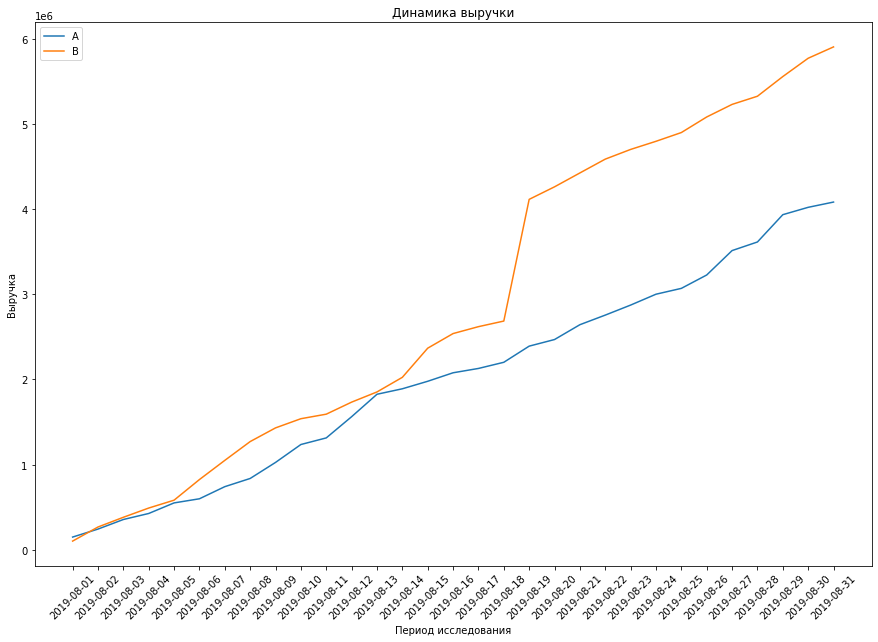

In [57]:
# Построим графики выручки по группам
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 10))
#plt.axis(["2019-08-01", '2019-08-31', 0, 7]) 

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Динамика выручки')
plt.xlabel('Период исследования')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.legend()


Выручка постепенно увеличивается в течении времени в двух группах, однако в группе B наблюдается аномальный рост в середине периода, что может свидетельствовать либо о слишком дорогих покупках в этой группе, либо о резком росте конверсии. Возможно, что на такое поведение кривой оказывают влияние оба фактора.

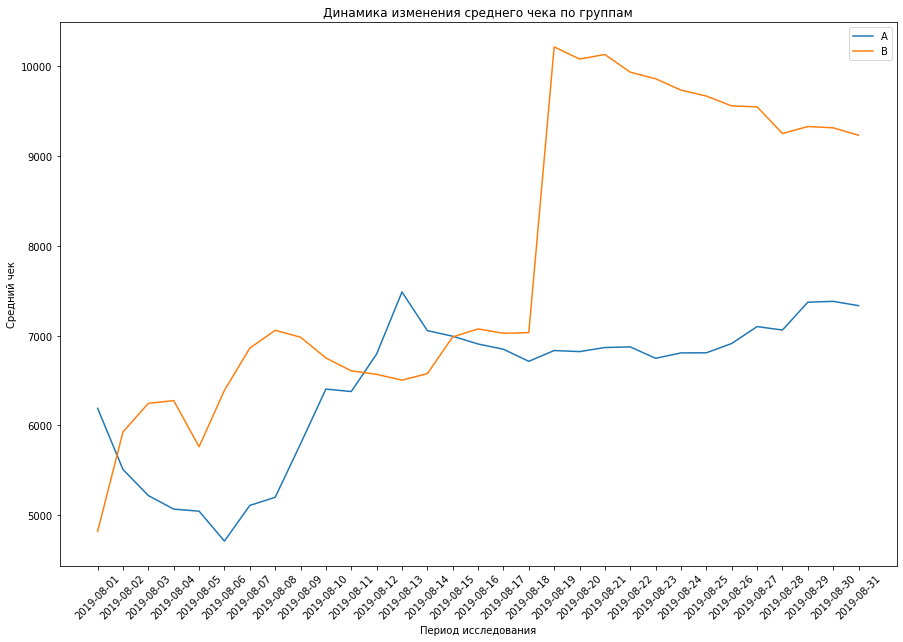

In [58]:
# Построим графики среднего чека по группам

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Динамика изменения среднего чека по группам')
plt.xlabel('Период исследования')
plt.ylabel('Средний чек')
plt.legend() 

Также, аномальное поведение наблюдается и на графике среднего чека. Однако, стоит отметить, что средний чек в группе B вырос гораздо стремительнее и поведение кривых более скачкообразное чем поведение кривых выручки.

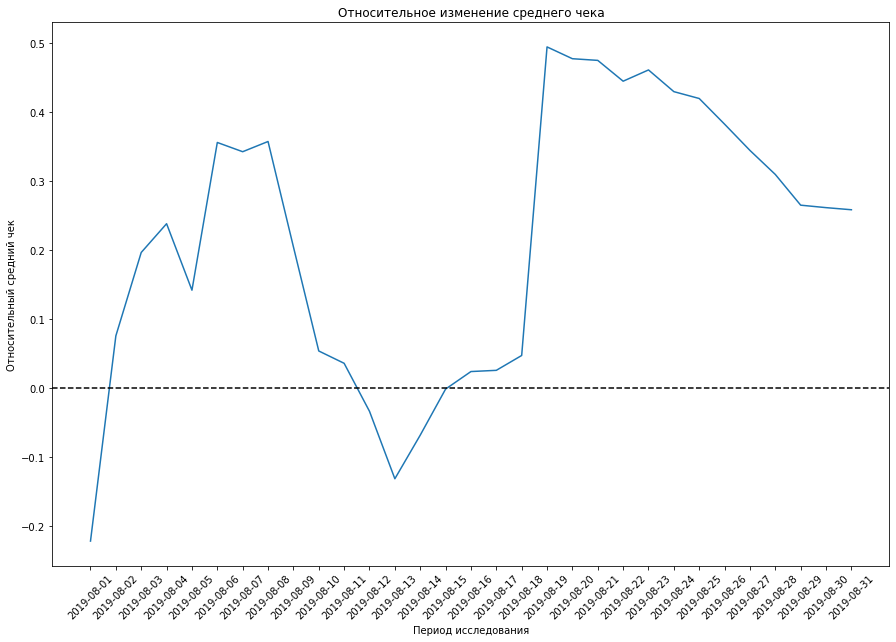

In [59]:
# Построим график относительного изменения среднего чека

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
mergedCumulativeRevenue = cumulativeRevenueA\
.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение среднего чека')
plt.xlabel('Период исследования')
plt.ylabel('Относительный средний чек')
plt.axhline(y=0, color='black', linestyle='--')

На графике видны выбросы, необходимо их идентифицировать

Text(0, 0.5, 'Кумулятивный средний чек')

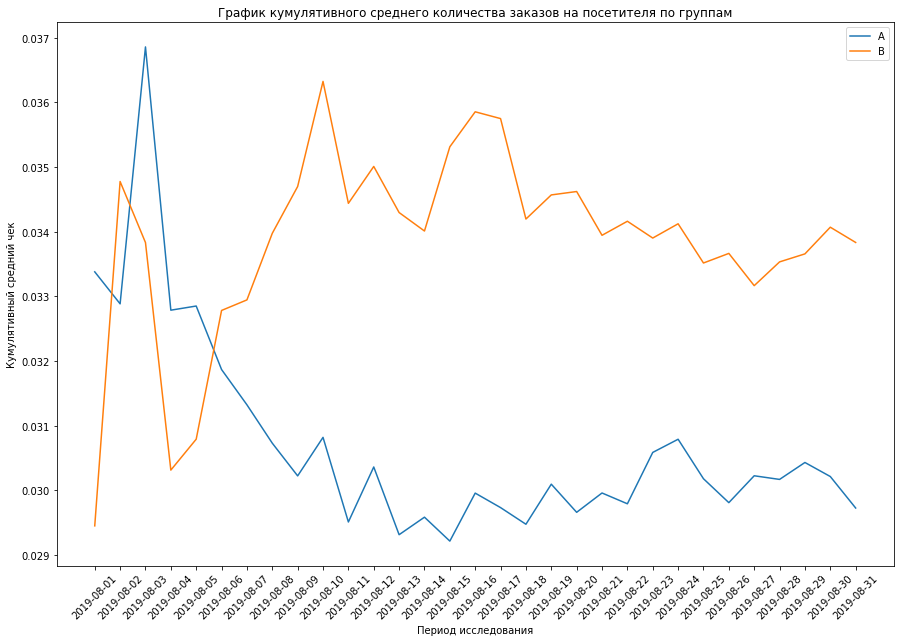

In [60]:
#Построим график кумулятивного среднего количества заказов на посетителя по группам
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Период исследования')
plt.ylabel('Кумулятивный средний чек')
#plt.axis(["2019-08-01", '2019-08-31', 0.02, 0.04]) 

Конверсия группы B ниже в начале периода, но вскоре происходит инверсия и конверсия группы B стремительно растет, а группы А сильно снижается.

(0.0, 30.0, -0.6, 0.6)

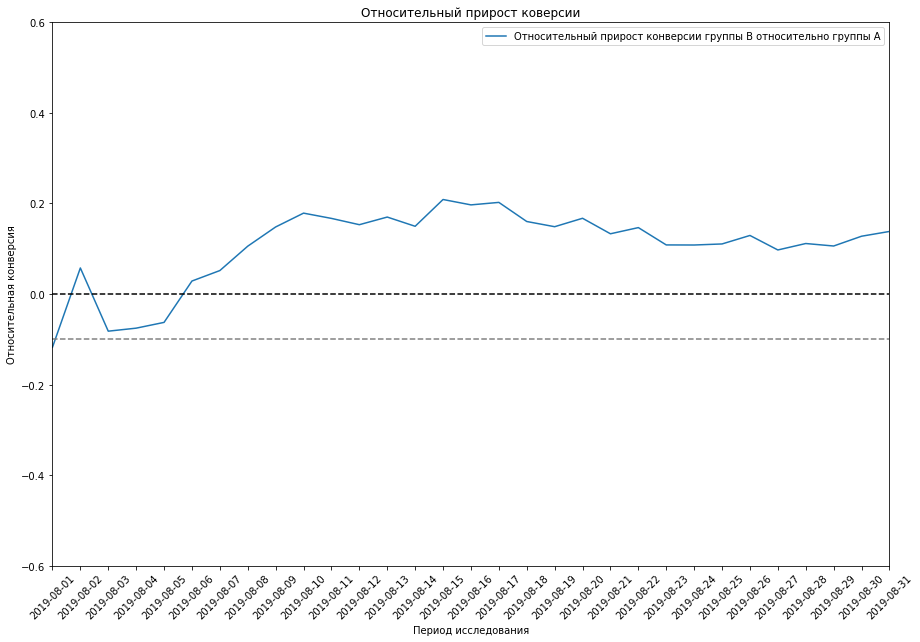

In [61]:
# Построим график относительного различия кумулятивных конверсий:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 10))
plt.xticks(rotation=45)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']\
/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительный прирост коверсии')
plt.xlabel('Период исследования')
plt.ylabel('Относительная конверсия')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6])


Подтверждаем, что конверсия группы B существенно выше относительно группы A

Text(0, 0.5, 'Количество заказов')

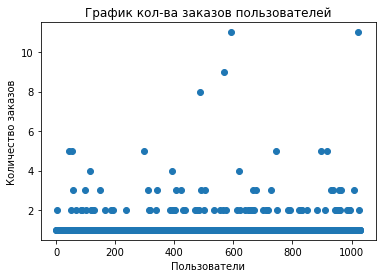

In [49]:
#Подсчитаем количество заказов по пользователям и построим точечный график:

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['userId', 'orders']

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.title('График кол-ва заказов пользователей')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')

Большинство покупателей заказывали только один раз. Однако доля пользователей с 2-3 заказами тоже значительна. 

In [14]:
#Посчитаем выборочные перцентили количества заказов на одного пользователя:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. 
Нужно взять 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Text(0, 0.5, 'Стоимость заказов')

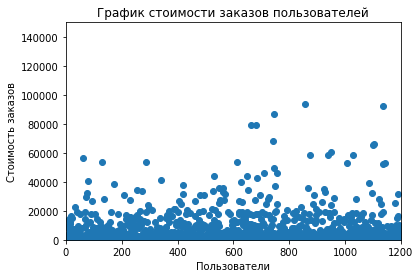

In [50]:
#Подсчитаем стоимости заказов по пользователям и построим точечный график:

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.axis([0, 1200, 0, 150000])
plt.title('График стоимости заказов пользователей')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

Text(0, 0.5, 'Стоимость заказов')

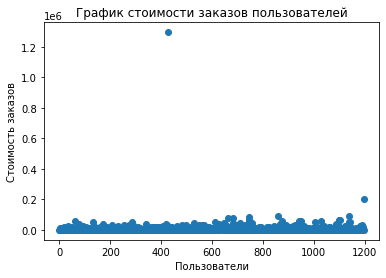

In [51]:
# Выведем график без ограничений

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.title('График стоимости заказов пользователей')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')

Заказ выше 1.2млн. - аномальный. Посчитаем перцентили. 

In [16]:
#Посчитаем выборочные перцентили стоимости заказов на одного пользователя:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Не более 5% пользователей оформляли заказ дороже 28 тысяч. И не более 1% пользователей заказывали на сумму в двое дороже. 
Аномальными кажутся заказы свыше 30000 единиц.

**Проверка гипотезы: среднее количество заказов пользователей в разных группах одинаковое** 

```

H_0: Среднее количество заказов в группе А = Среднее количество заказов в группе B`
H_1: Среднее количество заказов в группе А ≠ Среднее количество заказов в группе B`
alpha = 0.05
```

In [65]:
#Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data_av = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data_av.head(5))

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data_av['visitorsPerDateA']\
.sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data_av['visitorsPerDateB']\
.sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print('p-value:',"{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print('Различие в средних, д.е.:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Отвергаем нулевую гипотезу о том, что статистически значимого различия в среднем числе заказов между группами нет, т.к. p-value меньше 0.05. При этом, прирост среднего числа заказов группы B больше группы А на 13.8%.

**Проверка гипотезы: средняя стоимость заказов пользователей в разных группах одинаковая** 

```

H_0: Средний чек заказов в группе А = Средний чек заказов в группе B`
H_1: Средний чек заказов в группе А ≠ Средний чек заказов в группе B`
alpha = 0.05
```

In [18]:
# Проверим статистическую значимость различий в среднем чеке между группами
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))


0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Однако, средний чек группы B значительно выше среднего чека группы A, почти на 26%, но при таком уровне статистической значимости, данные значения получены случайно.

In [19]:
# Узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'], # по условиям выбранной границы заказов
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId'] # по условиям выбранной границы стоимости
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 


1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
dtype: int64
57


Всего 57 аномальных значений

**Проверка гипотезы: среднее количество заказов пользователей, после фильтрации, в разных группах одинаковое** 

```

H_0: Среднее количество заказов в группе А = Среднее количество заказов в группе B`
H_1: Среднее количество заказов в группе А ≠ Среднее количество заказов в группе B`
alpha = 0.05
```

In [69]:
# Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_av['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data_av['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 



0.018
0.148


После чистки данных снова наблюдаем низкое p-value, меньше 0.05. Отвергаем нулевую гипотезу. При этом, 
прирост среднего числа заказов группы B стал еще на 1% выше предыдущего.

**Проверка гипотезы: средняя стоимость заказов пользователей, после фильтрации, в разных группах одинаковая** 

```

H_0: Средний чек заказов в группе А = Средний чек заказов в группе B`
H_1: Средний чек заказов в группе А ≠ Средний чек заказов в группе B`
alpha = 0.05
```

In [70]:
# Посчитаем статистическую значимость различий в среднем чеке заказов между группами по «очищенным» данным
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.958
-0.020


P-value увеличился, но и разница между сегментами нивелировалась и теперь не превышает пол-процента. Отвергнуть нулевую гипотезу не удалось.

### Общий вывод

В результате исследования были приоритизированы гипотезы и проанализированы результаты A/B теста:

**Выводы:**
1. Наиболее приоритетными, с точки зрения инструмента ICE, являются следующие гипотезы:
    1. Запустить акцию, дающую скидку на товар в день рождения
    2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
    3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
2. Наиболее приоритетными, с точки зрения инструмента RICE, являются следующие гипотезы:
    1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
    2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
    3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
3. При необходимости учета охвата пользователей, рекомендуется использовать гипотезы, приоритизированные с помощью инструмента RICE;
4. Выручка постепенно увеличвается в течении времени в двух группах, однако в группе B наблюдается аномальный рост в середине периода;
5. Существует статистически значимое различие по среднему количеству заказов между группами и по «сырым», и по данным после фильтрации аномалий. Тест показывает, что количество заказов растет в группе B вне зависимости от содержания аномальных значений;
6. Однако, нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Но, при этом, после фильтрации аномалий, разница в среднем чеке между группами нивелировалась. Это объясняет аномальное поведение данных на графике среднего чека;
7. По результатам текущего тестирования наблюдается существенный рост заказов. В то же время, стоимость этих заказов практически не изменилась.
8. Рекомендуется зафиксировать результаты тестирования, победой группы B и остановить его. Так, уже сейчас наблюдается прогрессирующая, позитивная динамика группы B над А, с точки зрения количества заказов. Существующее целевое различие групп, вероятнее всего, уже не покажет различие в среднем чеке. 